In [ ]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [ ]:
FIREDUCKS_FLAGS = "--benchmark-mode"

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")


Dataset with 10 Million Rows Generated Successfully!


In [ ]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print(pdf.head())
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print(fdf.head())
print("FireDucks Read Time:", time.time() - start_time)


   user_id      amount category            timestamp
0   934577  341.340615     tech  2021-01-01 00:00:00
1   494148  513.086437     tech  2021-01-01 00:00:01
2   679912  672.714757     food  2021-01-01 00:00:02
3   894819  362.887345   travel  2021-01-01 00:00:03
4     8480  919.066792     food  2021-01-01 00:00:04
Pandas Read Time: 15.400895118713379
   user_id      amount category            timestamp
0   934577  341.340615     tech  2021-01-01 00:00:00
1   494148  513.086437     tech  2021-01-01 00:00:01
2   679912  672.714757     food  2021-01-01 00:00:02
3   894819  362.887345   travel  2021-01-01 00:00:03
4     8480  919.066792     food  2021-01-01 00:00:04
FireDucks Read Time: 2.491245746612549


In [ ]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print(pdf_grouped)
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print(fdf_grouped)
print("FireDucks GroupBy Time:", time.time() - start)

  category      amount
0  fashion  500.392240
1     food  500.210477
2     tech  499.984750
3   travel  500.125167
Pandas GroupBy Time: 0.9109272956848145
  category      amount
0  fashion  500.392240
1     food  500.210477
2     tech  499.984750
3   travel  500.125167
FireDucks GroupBy Time: 0.2738628387451172


In [ ]:
## for Pandas
start = time.time()
pdf_result = pdf[pdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(pdf_result)
print("Pandas Filter + GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_result = fdf[fdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(fdf_result)
print("FireDucks Filter + GroupBy Time:", time.time() - start)


  category      amount
0  fashion  750.218771
1     food  750.100081
2     tech  749.654349
3   travel  750.094400
Pandas Filter + GroupBy Time: 1.0043282508850098
  category      amount
0  fashion  750.218771
1     food  750.100081
2     tech  749.654349
3   travel  750.094400
FireDucks Filter + GroupBy Time: 0.27698278427124023


In [ ]:
## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("FireDucks Sort Time:", time.time() - start)



Pandas Sort Time: 11.498527526855469
FireDucks Sort Time: 0.0013582706451416016


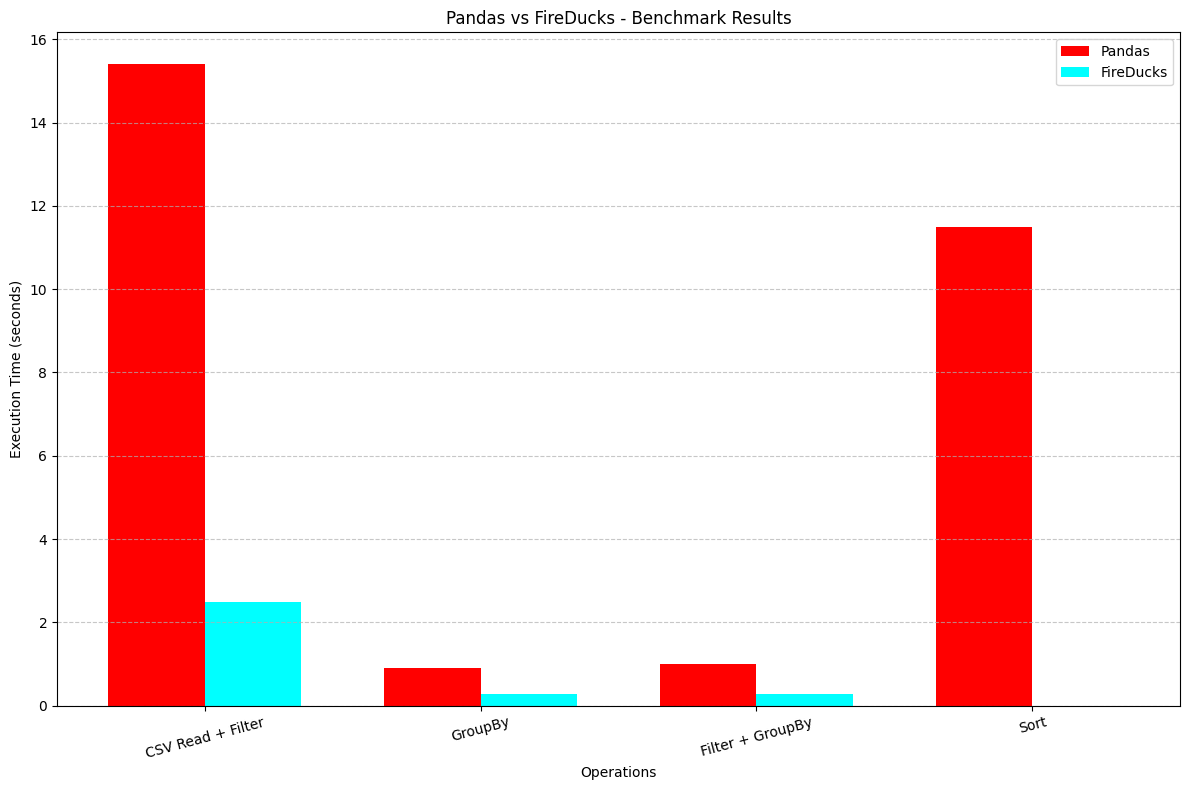

In [15]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort']

# Execution Times (in seconds)
pandas_times = [15.40, 0.91, 1.00, 11.49]      # Pandas compile Times
fireducks_times = [2.49, 0.27, 0.27, 0.001]     # FireDucks compile Times

x = range(len(operations))

plt.figure(figsize=(12, 8))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='red')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='cyan')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()